In [1]:
import numpy as np; import random; import fractions; import math
from matplotlib import pyplot, patches
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture 
from sklearn.metrics.cluster import silhouette_score
N_FEATURES=2; MIN_CENTERS=2; MAX_CENTERS=20

In [52]:
class Sample: 
    def __init__(self, n_samples, n_centers=3): 
        self.n_samples = n_samples
        self.n_centers = n_centers
    def _assign_positions(self, positions):
        self.positions = positions
        return
    def _assign_labels(self, labels):
        self.labels = labels
        return
    def reseed(self, new): 
        self.n_centers=new
        return
    def create_samples(self):
        pass   
class Normal_Blobs_Full(Sample): 
    def _semi_symm(self, n_dim_sqmat):  
        rng = np.random.default_rng()
        raw_mat = rng.uniform(low=0.0, high=0.1, size=(n_dim_sqmat, n_dim_sqmat))
        symm_mat = (raw_mat + np.transpose(raw_mat))/2 
        symm_semi_def_mat = np.dot(symm_mat, np.transpose(symm_mat))
        return symm_semi_def_mat
    def _assign_set_covariaces(self, set_cvmat): 
        self.set_cvmat = set_cvmat
        return 
    def _assign_set_means(self, set_means): 
        self.set_means = set_means
        return
    def assign_set_obliques(self, set_thetas): 
        self.set_thetas = set_thetas 
        return 
    def create_samples(self, n_feat=N_FEATURES):  
        rng = np.random.default_rng(); _frame=[0, 1]
        
        labels = np.ndarray(shape=(self.n_samples, 1), dtype=int)   
        set_lbl = np.linspace(start=0, stop=self.n_centers-1, num=self.n_centers-0, dtype=int) 
        for i in range(0, self.n_samples):  
            labels [i, 0] = rng.choice(set_lbl) 
        
        set_avg = rng.uniform(low=_frame[0], high=_frame[1], size=(self.n_centers, n_feat)) 
        set_cvmat = np.ndarray(shape=(self.n_centers, n_feat, n_feat))   
        for j in range(0, self.n_centers): 
            cov_ = self._semi_symm(n_feat)
            set_cvmat [j,:,:] = cov_
        
        positions = np.ndarray(shape=(self.n_samples, n_feat), dtype=float)
        for k in range(0, self.n_samples): 
            c_ = labels [k, 0]
            cv_ = rng.multivariate_normal(mean=set_avg [c_, :], cov=set_cvmat [c_, :, :]) 
            positions[k, :] = cv_
        self._assign_positions (positions); self._assign_labels (labels)
        return  
class Normal_Blobs_Identity(Sample): 
    def _assign_set_covariaces (self, set_cvmat): 
        self.set_cvmat = set_cvmat
        return 
    def _assign_set_means (self, set_means): 
        self.set_means = set_means
        return
    def assign_set_obliques (self, set_thetas): 
        self.set_thetas = set_thetas 
        return 
    def create_samples(self, n_feat=N_FEATURES): 
        VARIANCE =0.01
        rng = np.random.default_rng(); _frame=[0, 1] 
        labels = np.ndarray (shape=(self.n_samples, 1), dtype=int)   
        set_lbl = np.linspace (start=0, stop=self.n_centers-1, num=self.n_centers-0, dtype=int) 
        for i in range (0, self.n_samples):  
            labels [i, 0] = rng.choice (set_lbl) 
        
        set_avg = rng.uniform (low=_frame[0], high=_frame[1], size=(self.n_centers, n_feat))  
        set_cvmat = np.ndarray(shape=(self.n_centers, n_feat, n_feat))   
        for j in range(0, self.n_centers): 
            set_cvmat [j,:,:] = np.eye(N=n_feat, dtype=float) * VARIANCE
        
        positions = np.ndarray(shape=(self.n_samples, n_feat), dtype=float)
        for k in range(0, self.n_samples): 
            c_ = labels [k, 0]
            cv_ = rng.multivariate_normal(mean=set_avg [c_, :], cov=set_cvmat [c_, :, :]) 
            positions[k, :] = cv_
        self._assign_positions (positions); self._assign_labels (labels)
        return 
class Normal_Blobs_Sizes(Sample): 
    def _assign_set_covariaces (self, set_cvmat): 
        self.set_cvmat = set_cvmat
        return 
    def _assign_set_means (self, set_means): 
        self.set_means = set_means
        return
    def assign_set_obliques (self, set_thetas): 
        self.set_thetas = set_thetas 
        return 
    def create_samples(self, n_feat=N_FEATURES): 
        rng = np.random.default_rng(); _frame=[0, 1] 
        
        MIN_CLUST_VAR = 0.0001; MAX_CLUST_VAR = 0.01
        cluster_sizes = np.random.uniform (low=MIN_CLUST_VAR, high=MAX_CLUST_VAR, size=(self.n_centers, 1))
        
        labels = np.ndarray (shape=(self.n_samples, 1), dtype=int)   
        set_lbl = np.linspace (start=0, stop=self.n_centers-1, num=self.n_centers-0, dtype=int) 
        for i in range (0, self.n_samples):  
            labels [i, 0] = rng.choice (set_lbl) 
        
        set_avg = rng.uniform (low=_frame[0], high=_frame[1], size=(self.n_centers, n_feat))  
        set_cvmat = np.ndarray(shape=(self.n_centers, n_feat, n_feat))   
        for j in range(0, self.n_centers): 
            set_cvmat [j,:,:] = np.eye(N=n_feat, dtype=float) * cluster_sizes [j, 0]
        
        positions = np.ndarray(shape=(self.n_samples, n_feat), dtype=float)
        for k in range(0, self.n_samples): 
            c_ = labels [k, 0]
            cv_ = rng.multivariate_normal(mean=set_avg [c_, :], cov=set_cvmat [c_, :, :]) 
            positions[k, :] = cv_
        self._assign_positions (positions); self._assign_labels (labels)
        return 
class Normal_Blobs_Sparsity(Sample): 
    def _assign_set_covariaces (self, set_cvmat): 
        self.set_cvmat = set_cvmat
        return 
    def _assign_set_means (self, set_means): 
        self.set_means = set_means
        return
    def assign_set_obliques (self, set_thetas): 
        self.set_thetas = set_thetas 
        return 
    def create_samples(self, n_feat=N_FEATURES): 
        CLUSTER_VARIANCE = 0.001
        rng = np.random.default_rng(); _frame=[0, 1] 
        to_spar = np.random.uniform(low=0, high=1, size=(self.n_centers, 1)) 
        sparsity = to_spar / np.sum(to_spar)
        a_lbl = np.linspace(start=0, stop=-1+self.n_centers, num=self.n_centers, dtype=int) 
        labels = rng.choice(size=(self.n_samples, 1), p=sparsity.T[0, :], a= a_lbl) 
        
        set_avg = rng.uniform (low=_frame[0], high=_frame[1], size=(self.n_centers, n_feat))  
        set_cvmat = np.ndarray(shape=(self.n_centers, n_feat, n_feat))   
        for j in range(0, self.n_centers): 
            set_cvmat [j,:,:] = np.eye(N=n_feat, dtype=float) * CLUSTER_VARIANCE
        
        positions = np.ndarray(shape=(self.n_samples, n_feat), dtype=float)
        for k in range(0, self.n_samples): 
            c_ = labels [k, 0]
            cv_ = rng.multivariate_normal(mean=set_avg [c_, :], cov=set_cvmat [c_, :, :]) 
            positions[k, :] = cv_
        self._assign_positions (positions); self._assign_labels (labels)
        return  

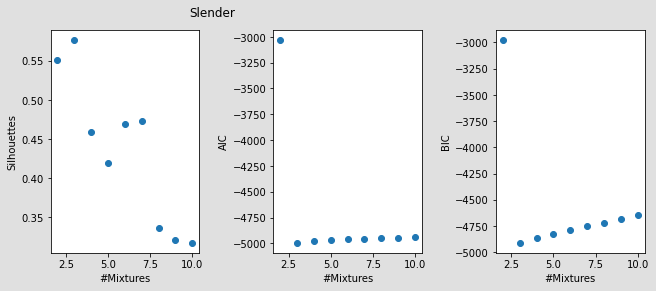

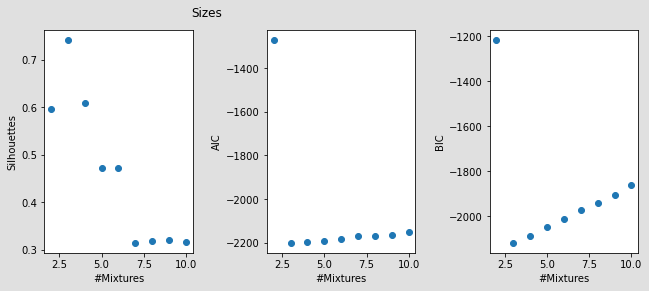

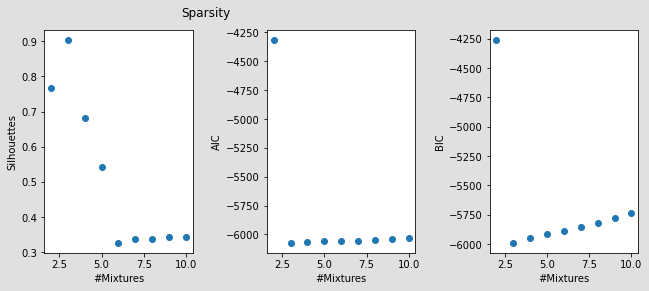

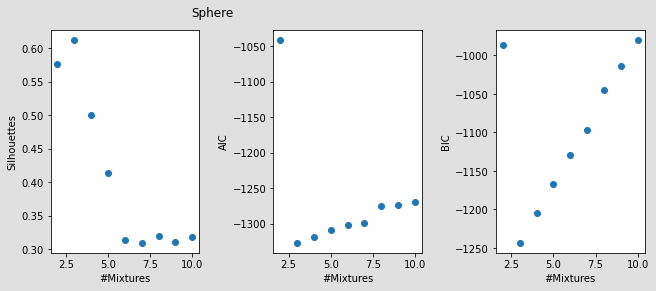

In [59]:
def _empirical_mean(X:np.ndarray): 
    return np.sum(X)/X.size  
def _plot_silhouettes(x,y,axs):  
    axs.scatter(x=x,y=y)
    axs.set_ylabel('Silhouettes')
    axs.set_xlabel('#Mixtures')
    return 
def _plot_aic(x,y,axs): 
    axs.scatter(x=x,y=y)
    axs.set_ylabel('AIC')
    axs.set_xlabel('#Mixtures')
    return
def _plot_bic(x,y,axs): 
    axs.scatter(x=x,y=y)
    axs.set_ylabel('BIC')
    axs.set_xlabel('#Mixtures')
    return
class Visual():  
    def create_rand_copies(self, batchsize, n_copies, n_centers, geometry): 
        self.geometry=geometry
        codex_={"Slender": Normal_Blobs_Full, 
                "Sizes": Normal_Blobs_Sizes,
                "Sparsity": Normal_Blobs_Sparsity, 
                "Sphere": Normal_Blobs_Identity
               }
        (blobs:=codex_[geometry](n_samples=batchsize,n_centers=n_centers)).create_samples() 
        self.X=np.zeros(shape=(n_copies,blobs.positions.shape[0],blobs.positions.shape[1]))
        for i in range(0,n_copies):  
            self.X[i,:,:]= blobs.positions
        return 
    def run(self,range_mix):
        self.range_mix=range_mix 
        #GMM copies x blobs  
        names_=['silhouette','aic','bic'] 
        self.n_mix=1+range_mix[1]-range_mix[0]
        n_copies=self.X.shape[0]
        #compute metric silhouettes
        scores=np.ndarray(shape=(len(names_),self.n_mix, n_copies))
        for name_code in range(len(names_)): 
            for mix_ in range(0,self.n_mix): 
                for dup_ in range(0,n_copies):
                    self.mixer=GaussianMixture(n_components=mix_+range_mix[0],random_state=0)
                    labels=self.mixer.fit_predict(X=self.X[dup_,:,:])  
                    scores[name_code, mix_, dup_]=self._calculate_metric(
                                                                         X=self.X[dup_,:,:],
                                                                         labels=labels,
                                                                         metric_name=names_[name_code])
        # empiracal mean silhouettes
        self.mean_metrics=np.ndarray(shape=(len(names_),self.n_mix))
        for j in range(0, len(names_)): 
            for i in range(0, self.n_mix):
                self.mean_metrics[j,i]=_empirical_mean(X=scores[j,i,:])
        return 
    def _calculate_metric(self,X,labels,metric_name:str): 
        if metric_name=='silhouette': metric_=silhouette_score(X=X,labels=labels)
        elif metric_name=='aic': metric_= self.mixer.aic(X) 
        elif metric_name=='bic': metric_=self.mixer.bic(X)
        return metric_ 
    def plot_metrics(self):
        fig, axs=pyplot.subplots(nrows=1,ncols=3)
        x=np.linspace(start=self.range_mix[0],stop=self.range_mix[1],num=self.n_mix)  
        _plot_silhouettes(axs=axs[0],x=x,y= self.mean_metrics[0,:]) 
        _plot_aic(axs=axs[1],x=x,y= self.mean_metrics[1,:])
        _plot_bic(axs=axs[2],x=x,y= self.mean_metrics[2,:])
        pyplot.suptitle(self.geometry)
        pyplot.subplots_adjust(right=1.5, wspace=.50, hspace=0.3, top=0.9)
        fig.patch.set_facecolor ('#E0E0E0') 
        pyplot.show(); pyplot.close()
        return
for geometry in ['Slender', 'Sizes', 'Sparsity', 'Sphere']: 
    (charter:=Visual()).create_rand_copies(batchsize=1000,n_copies=1000,n_centers=3,geometry=geometry) 
    charter.run(range_mix=(2,10))
    charter.plot_metrics()